In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/trading_bot/Resultados_Finales.csv')

df = df.loc[df['accion'] != 'HOOD', :]
df = df.loc[df['accion'] != 'AMD', :]
df = df.loc[df['accion'] != 'PLTR', :]

#df
# 2021-08-07", "2021-11-09"
#set(df.accion)
#len(set(df.accion))

In [21]:
df.groupby('estrategia').agg({'Resultados': 'mean', 'Efectividad':'mean'})

,Resultados,Efectividad
estrategia,,
estrategia_0,0.467216,50.424324
estrategia_1,0.411324,53.190324
estrategia_2,0.687919,55.440541


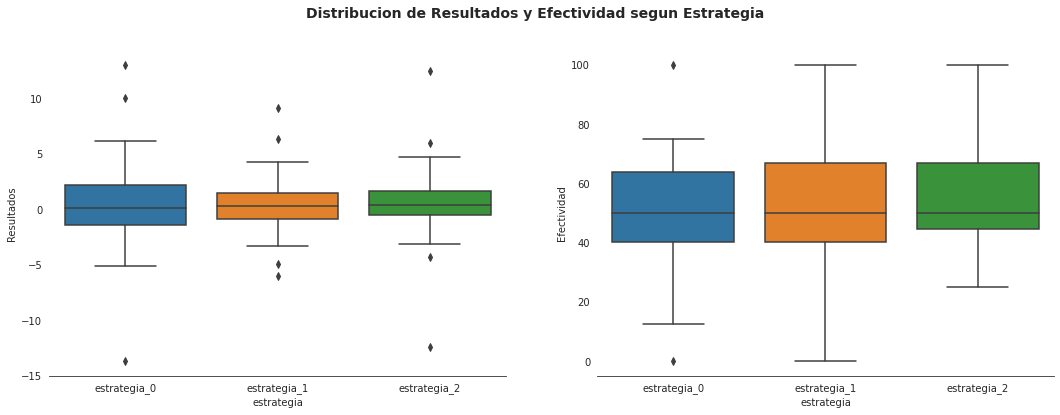

In [5]:
sns.set_style('white')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

fig.suptitle("Distribucion de Resultados y Efectividad segun Estrategia",  fontsize = 14, fontweight = "semibold") 

sns.boxplot(x="estrategia", y="Resultados", data=df, ax=axes[0])
sns.boxplot(x="estrategia", y="Efectividad", data=df, ax=axes[1])

sns.despine(left = True)

plt.show()
 

## Distribucion de valores de los indicadores y Vantana Operable

In [6]:
# agrego col diff TP - SL
df['Vent_Op'] = df.apply(lambda x: x['TP'] - x['SL'], axis=1)

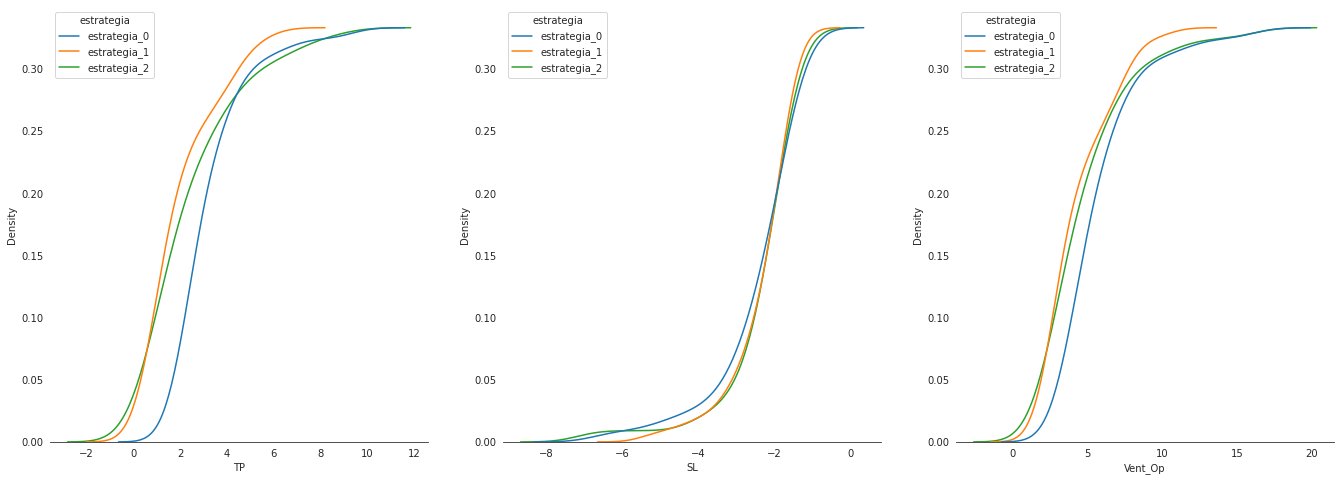

In [7]:
# Set initial plot options
sns.set_style('white')

fig, axes = plt.subplots(1, 3, figsize=(23, 8))


sns.kdeplot(data=df, x="TP", hue="estrategia", ax = axes[0], cumulative=True)


sns.kdeplot(data=df, x="SL", hue="estrategia", ax = axes[1], cumulative=True)
#sns.kdeplot(data=df, x="TR", hue="estrategia", ax = axes[2], cumulative=True)
sns.kdeplot(data=df, x="Vent_Op", hue="estrategia", ax = axes[2], cumulative=True)

sns.despine(left = True)

plt.show()

## Cantidad de tipo de operaciones segun Estrategia

In [14]:
df_trade = pd.read_csv('/content/gdrive/MyDrive/trading_bot/Trades_final.csv')
df_trade.drop(columns=['datetime'], inplace=True)
#df_trade.head()

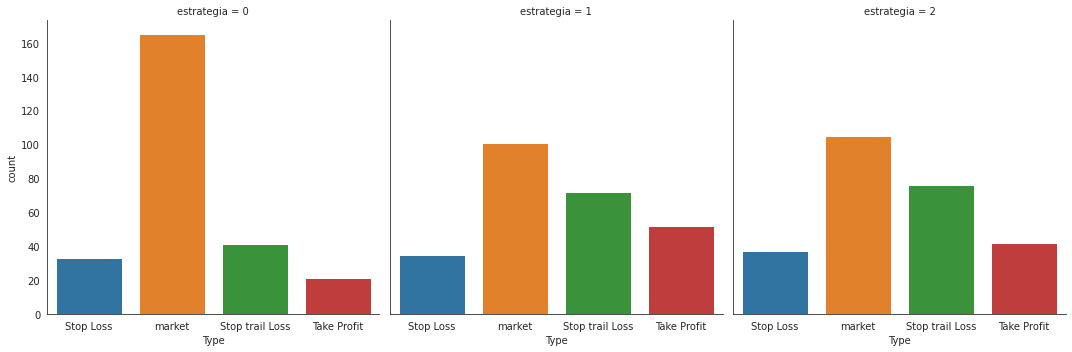

In [15]:
#figure(figsize=(8, 6)
g = sns.catplot(x="Type", kind="count", col="estrategia", data=df_trade, order=['Stop Loss', 'market', 'Stop trail Loss', 'Take Profit'])


In [ ]:
# tabla de porcentajes

#df.groupby('estrategia')

## Acciones con mejor y peor resultado

In [16]:
# Mejores
df.loc[df['Operaciones'] >= 10, ['accion', 'estrategia', 'Resultados', 'Efectividad', 'Operaciones']].nlargest(10, 'Resultados')

,accion,estrategia,Resultados,Efectividad,Operaciones
90,SPCE,estrategia_0,13.021,66.667,12
92,SPCE,estrategia_2,12.459,66.667,12
48,MRNA,estrategia_0,10.047,72.222,18
91,SPCE,estrategia_1,9.141,66.667,12
57,NCLH,estrategia_0,4.907,63.636,11
50,MRNA,estrategia_2,4.688,55.556,18
49,MRNA,estrategia_1,4.206,55.556,18
119,XPEV,estrategia_2,4.194,50.000,10
59,NCLH,estrategia_2,3.873,72.727,11
118,XPEV,estrategia_1,3.071,50.000,10


In [17]:
# Peores
df.loc[df['Operaciones'] >= 10, ['accion', 'estrategia', 'Resultados', 'Efectividad', 'Operaciones']].nsmallest(10, 'Resultados')

,accion,estrategia,Resultados,Efectividad,Operaciones
27,DKNG,estrategia_0,-2.394,41.667,12
28,DKNG,estrategia_1,-1.929,50.000,12
117,XPEV,estrategia_0,-0.876,40.000,10
106,X,estrategia_1,0.104,40.000,10
29,DKNG,estrategia_2,0.197,50.000,12
107,X,estrategia_2,0.400,40.000,10
58,NCLH,estrategia_1,0.505,63.636,11
105,X,estrategia_0,1.558,40.000,10
118,XPEV,estrategia_1,3.071,50.000,10
59,NCLH,estrategia_2,3.873,72.727,11


In [18]:
#df.loc[df.accion == 'SPCE',:]
df.loc[df.accion == 'MRNA',:]
#df.loc[df.accion == 'DKNG',:]
#df.loc[df.accion == 'XPEV',:]


,accion,estrategia,TP,SL,TR,sample,sample_per,Resultados,Efectividad,RR,Operaciones,Vent_Op
48,MRNA,estrategia_0,4.20,-2.74,3.00,101,39.92,10.047,72.222,1.532847,18,6.94
49,MRNA,estrategia_1,5.06,-2.27,2.38,52,20.55,4.206,55.556,2.229075,18,7.33
50,MRNA,estrategia_2,5.13,-1.80,2.19,22,19.30,4.688,55.556,2.850000,18,6.93


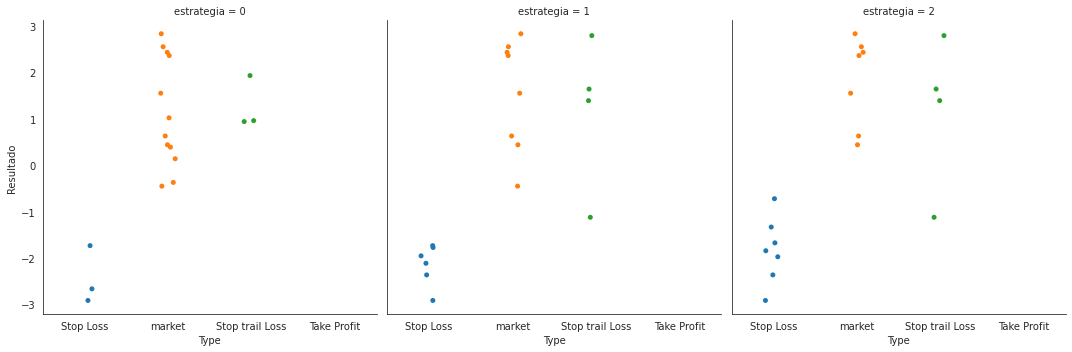

In [19]:

# Mejores
#data = df_trade.loc[df_trade.accion == 'SPCE', :]
data = df_trade.loc[df_trade.accion == 'MRNA', :]
# Peores
#data = df_trade.loc[df_trade.accion == 'DKNG', :]
#data = df_trade.loc[df_trade.accion == 'XPEV', :]

g = sns.catplot(x="Type", y="Resultado", col="estrategia", data=data, aspect=1, order=['Stop Loss', 'market', 'Stop trail Loss', 'Take Profit'])

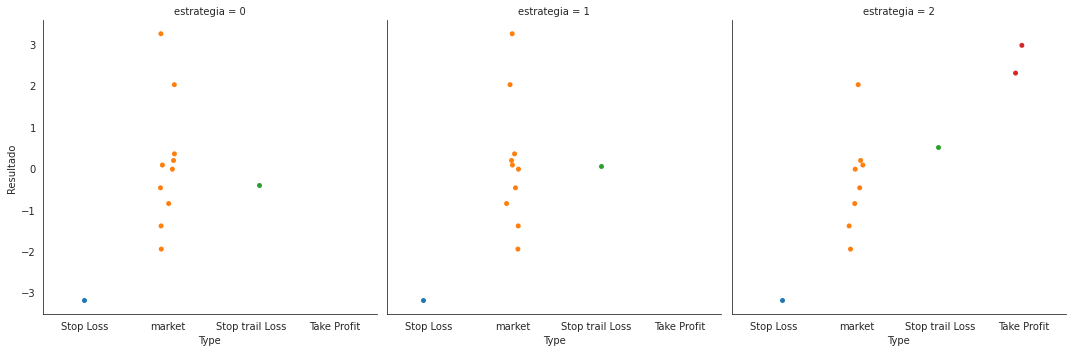

In [20]:
data = df_trade.loc[df_trade.accion == 'DKNG', :]
g = sns.catplot(x="Type", y="Resultado", col="estrategia", data=data, aspect=1, order=['Stop Loss', 'market', 'Stop trail Loss', 'Take Profit'])